# Flow Insurance

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import re
import glob
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.precision', 2)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
def line_to_grid(linear_range=[0, 1, 2, 3], grid_shape=[2, 3]):
    '''Return a list of 2-D coordinates corresponding to a each element of a 1-D array/list of objects, in shape = grid_shape
    Useful for converting a linear index into a coordinate grid for charting purposes. Note that elements of
    linear range that do not fit in a grid of shape = grid_shape will be truncated.
    Arguments:
    | -- linear_range, list of ints: input indexes to be converted to a 2-d grid.
    | -- grid_shape, tuple of ints: the shape of the coordinate grid returned
    Returns:
        a dict with keys = indexes of the linear_range, and values = grid coordinates.
    '''
    # make a list of indices for the linear_range
    linear_range = [_ for _ in dict(enumerate(linear_range))]
    grid_coords = []
    for r in range(grid_shape[0]):
        for c in range(grid_shape[1]):
            grid_coords.append((r, c))

    return dict(zip(linear_range, grid_coords))

In [41]:
def quickplot(data, plot_title='', ylabel='', xlabel='', legend=[], yaxisformat="{x:,.2f}"):
    fig, ax = plt.subplots(1,1, figsize=(10,5))
    ax.plot(data)
    ax.set_ylabel(ylabel)
    plt.xlabel(xlabel)
    ax.set_title(plot_title)
    
    #     ax.xaxis.set_major_locator(tkr.MultipleLocator())
    ax.xaxis.set_major_locator(tkr.MaxNLocator(8))
    ax.yaxis.set_major_formatter(yaxisformat)
    if len(legend)>0:
        ax.legend(legend)
    ax.grid()
    plt.show()

## Customer Flow Data Analysis

In [5]:
files = glob.glob('..\\..\\__Veles Water\\Smart Meters\\Kritsnam\\Dhaara Smart Data\\FM*')
customerFlowData = {f[f.find("FM"):f.find(".xlsx")]: pd.read_excel(f) for f in files}
for i, cfd in customerFlowData.items():
    customerFlowData[i].set_index('Time', inplace=True)
    customerFlowData[i].sort_index(axis=0, inplace=True)
    customerFlowData[i]['Actual Volume'] = customerFlowData[i]['Cumulative Volume'].diff()

### Meter#: FM-55

- 4 story office building in UP state.
- They saw the pumping time was much higher than expected and when diagnosed they found the motor was pumping water ON and OFF as the water level dropped very low.

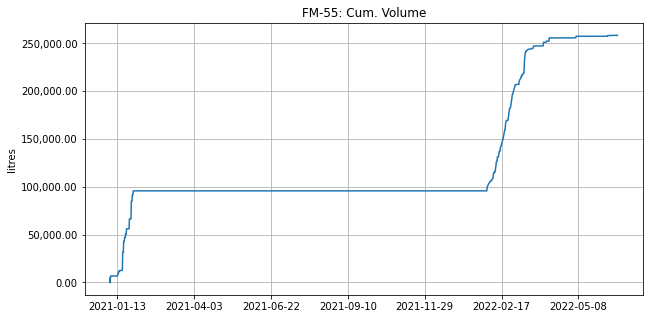

In [42]:
quickplot(customerFlowData['FM-55']['Cumulative Volume'], plot_title='FM-55: Cum. Volume', ylabel='litres')

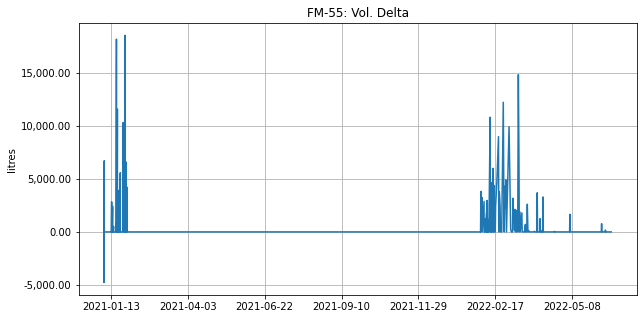

In [43]:
quickplot(customerFlowData['FM-55']['Cumulative Volume'].diff(), plot_title='FM-55: Vol. Delta', ylabel='litres')

### Meter#: FM-70

- Rice producing company in MP state
- They saw the pumping time was much higher than expected and when diagnosed they found the motor was pumping water ON and OFF as the water level dropped very low.

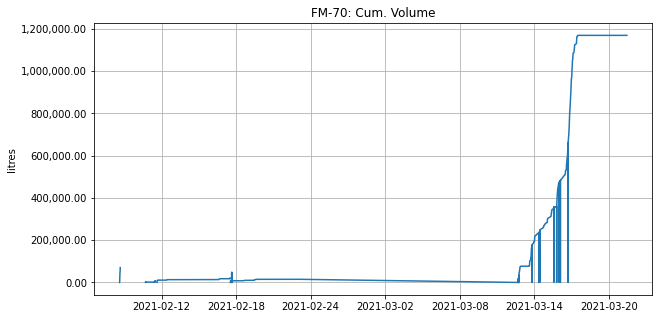

In [20]:
quickplot(customerFlowData['FM-70']['Cumulative Volume'], plot_title='FM-70: Cum. Volume', ylabel='litres')

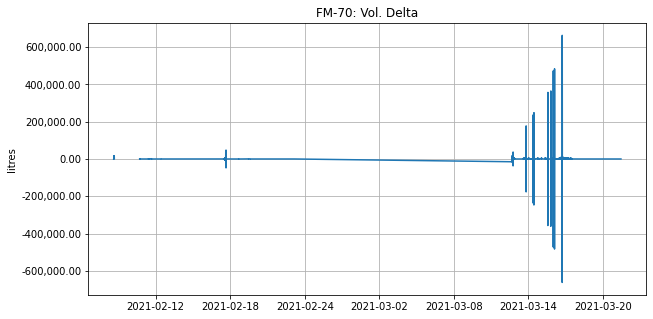

In [21]:
quickplot(customerFlowData['FM-70']['Cumulative Volume'].diff(), plot_title='FM-70: Vol. Delta', ylabel='litres')

### Meter#: FM-684

- Textile company in Rajasthan
- The borewell dried out during summer season and faced interruption

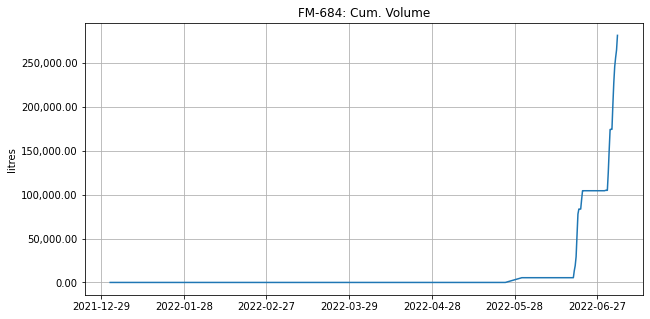

In [22]:
quickplot(customerFlowData['FM-684']['Cumulative Volume'], plot_title='FM-684: Cum. Volume', ylabel='litres')

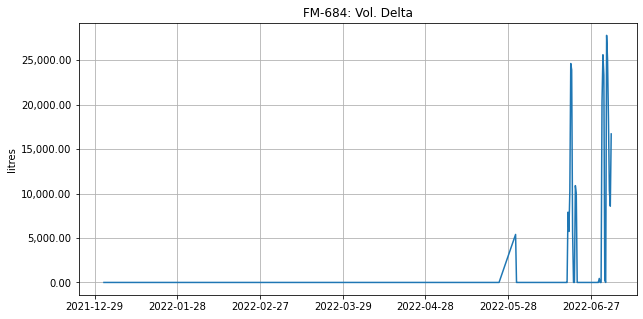

In [23]:
quickplot(customerFlowData['FM-684']['Cumulative Volume'].diff(), plot_title='FM-684: Vol. Delta', ylabel='litres')

### Meter#: FM-698

- Textile company in Rajasthan
- The borewell dried out during summer season and faced interruption

In [36]:
customerFlowData['FM-698']['Cumulative Volume'].head(10)

Time
2022-01-01 08:00:00        0
2022-01-01 10:00:00        0
2022-05-30 16:00:00    32490
2022-05-31 00:00:00    42930
2022-05-31 08:00:00    49317
2022-05-31 16:00:00    49683
2022-06-01 00:00:01    49683
2022-06-01 08:00:01    49683
2022-06-01 16:00:00    49683
2022-06-02 00:00:01    49683
Name: Cumulative Volume, dtype: int64

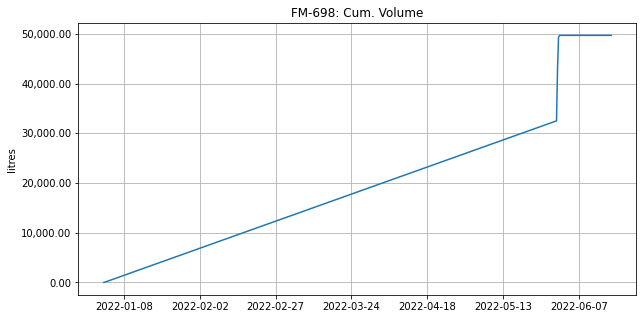

In [24]:
quickplot(customerFlowData['FM-698']['Cumulative Volume'], plot_title='FM-698: Cum. Volume', ylabel='litres')

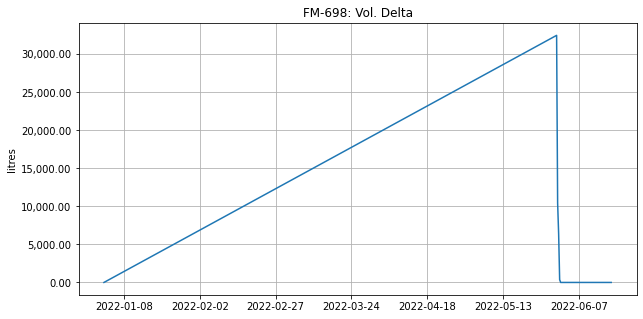

In [12]:
quickplot(customerFlowData['FM-698']['Cumulative Volume'].diff(), plot_title='FM-698: Vol. Delta', ylabel='litres')

### Meter#: FM-702

- Textile company in Rajasthan
- The borewell dried out during summer season and faced interruption

In [38]:
customerFlowData['FM-702']['Cumulative Volume'].head(10)

Time
2022-01-01 08:00:00        0
2022-01-01 08:00:00        0
2022-01-01 10:00:00        0
2022-05-30 08:00:01    12280
2022-05-30 16:00:01    12280
2022-05-31 00:00:00    12280
2022-05-31 08:00:01    12280
2022-05-31 16:00:00    12280
2022-05-31 16:00:00    12280
2022-06-01 00:00:01    12280
Name: Cumulative Volume, dtype: int64

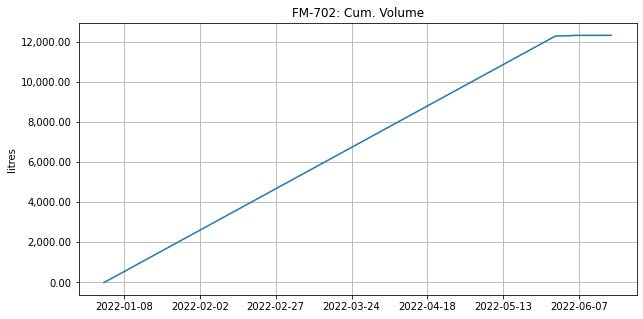

In [25]:
quickplot(customerFlowData['FM-702']['Cumulative Volume'], plot_title='FM-702: Cum. Volume', ylabel='litres')

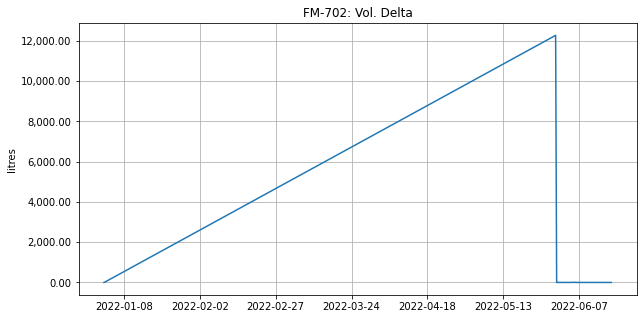

In [34]:
quickplot(customerFlowData['FM-702']['Cumulative Volume'].diff(), plot_title='FM-702: Vol. Delta', ylabel='litres')

### Meter#: FM-705

- Textile company in Rajasthan
- Motor was burnt because of excessive usage and has been replaced. There was a supply interruption for a short period of time.

In [39]:
customerFlowData['FM-705']['Cumulative Volume'].head(10)

Time
2022-01-01 08:00:00        0
2022-01-01 08:00:00        0
2022-01-01 10:00:00        0
2022-05-24 16:00:00        0
2022-05-30 16:00:01    33711
2022-05-31 00:00:00    33711
2022-05-31 08:00:01    33711
2022-05-31 16:00:00    33711
2022-06-01 00:00:01    33711
2022-06-01 08:00:01    33711
Name: Cumulative Volume, dtype: int64

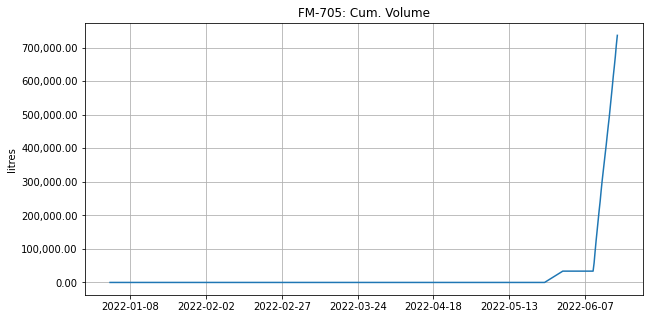

In [32]:
quickplot(customerFlowData['FM-705']['Cumulative Volume'], plot_title='FM-705: Cum. Volume', ylabel='litres')

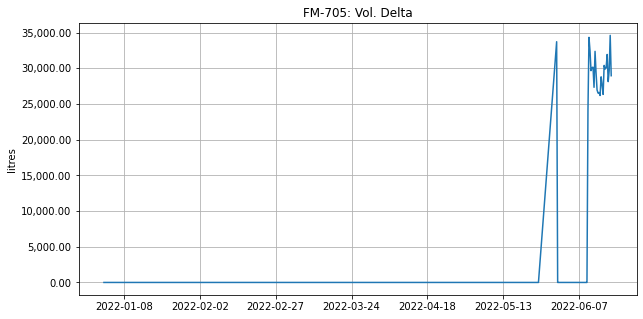

In [33]:
quickplot(customerFlowData['FM-705']['Cumulative Volume'].diff(), plot_title='FM-705: Vol. Delta', ylabel='litres')